# lista 3

## część 1

## zadanie 1

In [118]:
from scipy.stats import uniform, gamma, expon
import scipy.special as sp, seaborn as sns
import random, matplotlib.pyplot as plt, numpy as np

In [4]:
n = 1000
pr = [0.11, 0.12, 0.27, 0.19, 0.31]
q = 1/5

In [5]:
c = max([pr[i]/q for i in range(len(pr))])

In [6]:
def akcodrz():
    u = random.random()
    y = random.randint(1,5)
    if u<pr[y-1]/(c*q):
        return y
    else:
        return akcodrz()

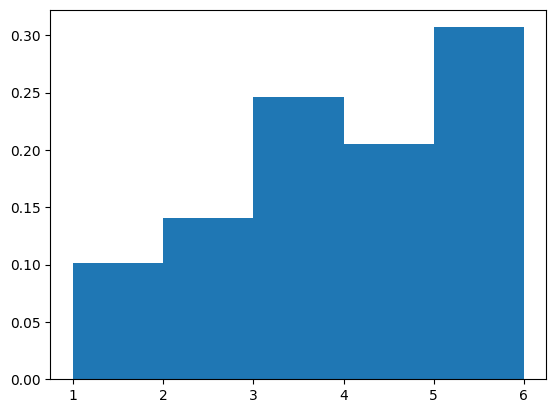

In [7]:
t=[akcodrz() for _ in range(n)]
plt.hist(t,density=True, bins=[1,2,3,4,5,6])
plt.show()

In [8]:
sr = sum(pr[i]*(i+1) for i in range(5)) 

In [10]:
print(sr, sum(t)/n) 

3.47 3.476


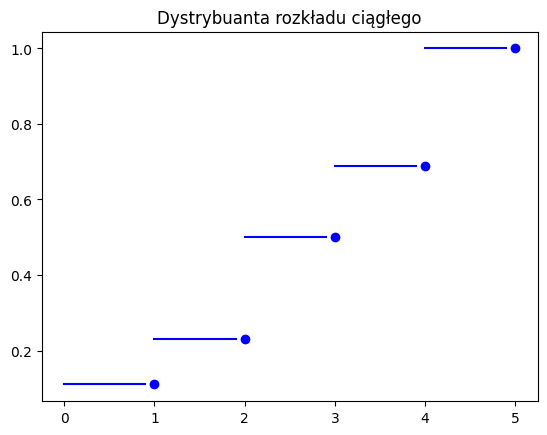

In [56]:
F = []
t = [1,2,3,4,5]
for i in range(5):
    F.append(sum(pr[0:i+1]))
for i,c in enumerate(t):
    plt.plot(np.arange(i,c,0.1), [F[i] for _ in range(10)], color='blue')
    plt.plot(c, F[i], 'bo')
plt.title('Dystrybuanta rozkładu ciągłego')
plt.show()


## zadanie 2

In [11]:
def f_gamma(x):
    return 1/16 * x**2 * np.exp(-x/2)

In [12]:
def F_gamma(x):
    return (16- 2*np.exp(-x/2)*(8+x*(4+x)))/16

In [13]:
def f_exp(x, lambd = 1/4):
    return lambd*np.exp(-lambd*x)

In [14]:
xs = np.linspace(0,50,5000)
m = max(f_gamma(i)/f_exp(i) for i in xs)

In [15]:
print(m)

2.165364445148121


In [109]:
def ao(f_gamma):
    y = np.random.exponential(4)
    u = np.random.rand()
    if u <= f_gamma(y)/(m*f_exp(y)):
        return y
    else:
        return ao(f_gamma)

In [17]:
t2=[ao() for _ in range(1,100000, 100)]

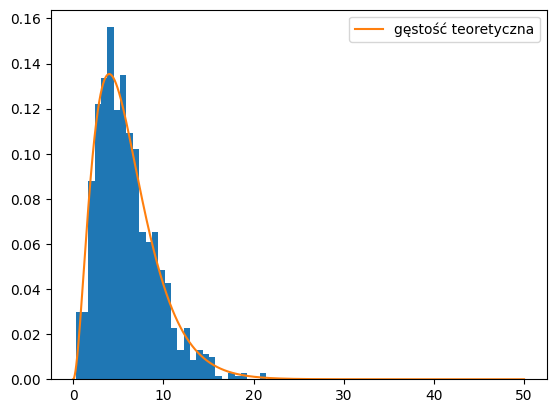

In [57]:
plt.hist(t2,density=True, bins=30)
plt.plot(xs, [f_gamma(x) for x in xs ], label = 'gęstość teoretyczna')
plt.legend()
plt.show()

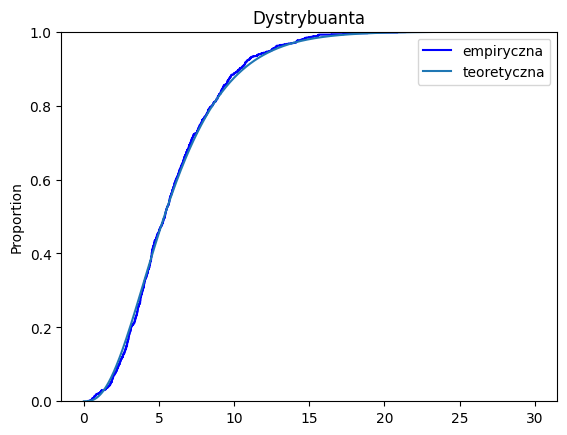

In [59]:
x_values = np.linspace(0,30,1000)
z_values = gamma.cdf(np.linspace(0,30,1000), a=3, scale = 2)
sns.ecdfplot(data=t2, label="empiryczna", color="blue")
plt.plot(x_values, z_values, label = 'teoretyczna')
plt.legend()
plt.title('Dystrybuanta')
plt.show()



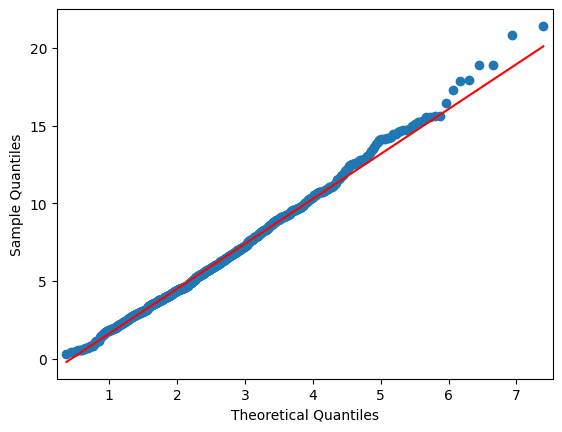

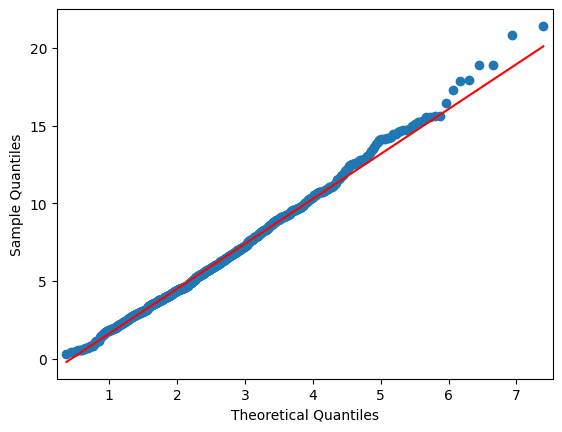

In [25]:
import statsmodels.api as sm
sm.qqplot(np.array(t2), dist=gamma, distargs=(5,), line='q', scale = 0.5)

In [26]:
def war_pr(X):
    n = len(X)
    return 1/(n-1)*sum((xi - sum(X)/n)**2 for xi in X)

def srednia(X):
    n = len(X)
    return sum(X)/n


In [27]:
print(war_pr(t2), 3*2**2)

10.910700043725445 12


In [28]:
print(srednia(t2), 2*3)

5.957367333602797 6


## część 2

In [81]:
def akcod(a, b, f):
    m = max([f(i) for i in np.linspace(a,b,1000)])
    u = np.random.uniform(a,b)
    v = np.random.uniform(0,m)
    if v <= f(u):
        return u
    else:
        return akcod(a,b,f)

Rozkład 1

In [97]:
f1 = lambda x: 3 / 2 * (1 - x ** 2)
F1 = lambda x: -1 / 2 * x * (x**2 - 3)
ex1 = [akcod(0,1,f1) for _ in range(1000)]
print('Expected value: empirical:', np.average(ex1), 'theoretical:', 0.375)
print('Variance: empirical:', np.var(ex1), 'theoretical:', 19 / 320)

Expected value: empirical: 0.39227349882560575 theoretical: 0.375
Variance: empirical: 0.06081249000127793 theoretical: 0.059375


[1.5, 1.499998496995494, 1.499993987981976, 1.499986472959446, 1.499975951927904, 1.4999624248873498, 1.4999458918377837, 1.4999263527792057, 1.4999038077116156, 1.4998782566350133, 1.4998496995493993, 1.4998181364547731, 1.4997835673511348, 1.4997459922384846, 1.4997054111168224, 1.4996618239861483, 1.499615230846462, 1.499565631697764, 1.4995130265400536, 1.4994574153733313, 1.499398798197597, 1.4993371750128506, 1.4992725458190925, 1.499204910616322, 1.4991342694045398, 1.4990606221837455, 1.498983968953939, 1.4989043097151207, 1.4988216444672902, 1.4987359732104477, 1.4986472959445933, 1.4985556126697268, 1.4984609233858484, 1.4983632280929577, 1.4982625267910552, 1.4981588194801407, 1.4980521061602143, 1.4979423868312758, 1.497829661493325, 1.4977139301463624, 1.497595192790388, 1.4974734494254014, 1.4973487000514027, 1.4972209446683922, 1.4970901832763694, 1.4969564158753348, 1.4968196424652882, 1.4966798630462295, 1.4965370776181586, 1.496391286181076, 1.4962424887349812, 1.4960

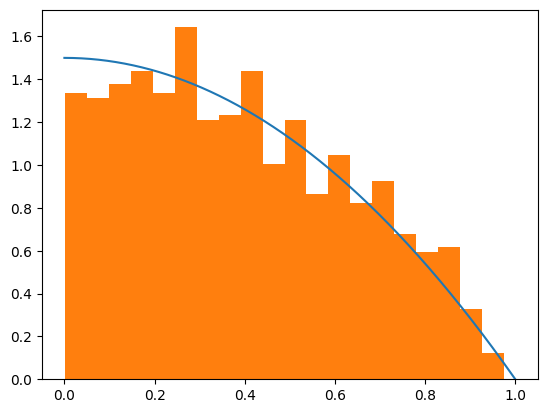

In [106]:
xs = np.linspace(0,1,1000)
print([f1(i) for i in xs])
plt.plot(xs, [f1(i) for i in xs])
plt.hist(ex1, density = True, bins = 20)
plt.show()

Rozkład 2

In [99]:
f2 = lambda x: 3 / 2 * np.sin(x) * (np.cos(x))**2
F2 = lambda x: 1 / 2 * (1 - (np.cos(x))**3)
ex2 = [akcod(0, np.pi, f2) for _ in range(1000)]
print('Expected value: empirical:', np.average(ex2), 'theoretical:', np.pi / 2)
print('Variance: empirical:', np.var(ex2), 'theoretical:', np.pi**2 / 4 - 14/9)

Expected value: empirical: 1.5749283750328142 theoretical: 1.5707963267948966
Variance: empirical: 0.9260257910749037 theoretical: 0.9118455447167839


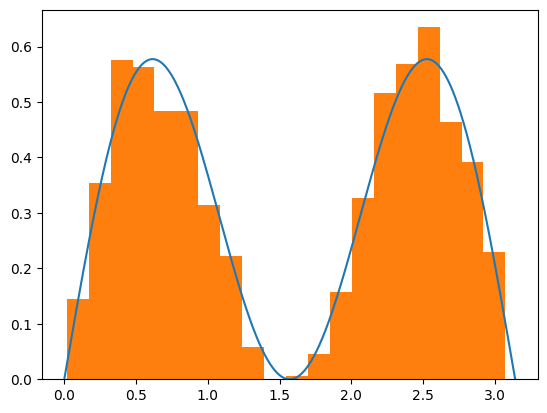

In [105]:
xs2 = np.linspace(0,np.pi,1000)
plt.plot(xs2, [f2(i) for i in xs])
plt.hist(ex2, density = True, bins = 20)
plt.show()

Rozkład 3

In [123]:
f3 = lambda x: 2 * np.sqrt(1 / 2 / np.pi) * np.exp(-x ** 2 / 2)
F3 = lambda x: sp.erf(x / np.sqrt(2))
xs3 = np.linspace(0,10, 200)
ex3 = [ao(f3) for _ in xs3]
print('Expected value: empirical:', np.average(ex3), 'theoretical:', np.sqrt(2/np.pi))
print('Variance: empirical:', np.var(ex3), 'theoretical:', 1 - 2/np.pi)

Expected value: empirical: 0.9003844537266583 theoretical: 0.7978845608028654
Variance: empirical: 0.3586685410736352 theoretical: 0.3633802276324186


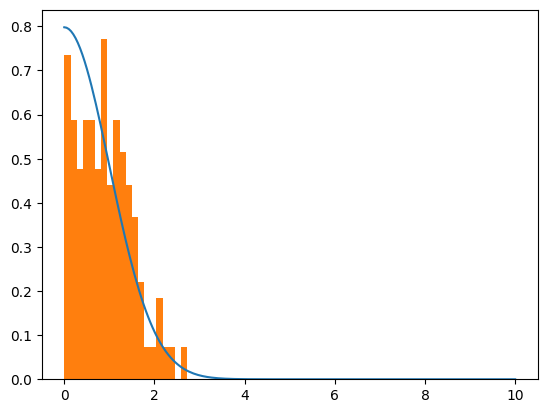

In [126]:
plt.plot(xs3, [f3(i) for i in xs3])
plt.hist(ex3, density = True, bins = 20)
plt.show()